In [1]:
import random

def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

In [2]:
def multiplicative_inverse(e, phi):
    d = 0
    x1 = 0
    x2 = 1
    y1 = 1
    temp_phi = phi

    while e > 0:
        temp1 = temp_phi // e
        temp2 = temp_phi - temp1 * e
        temp_phi = e
        e = temp2

        x = x2 - temp1 * x1
        y = d - temp1 * y1

        x2 = x1
        x1 = x
        d = y1
        y1 = y

    if temp_phi == 1:
        return d + phi

In [3]:
def generate_keypair(p, q):
    if not (is_prime(p) and is_prime(q)):
        raise ValueError("Both numbers must be prime.")
    elif p == q:
        raise ValueError("p and q cannot be equal.")

    n = p * q
    phi = (p - 1) * (q - 1)

    e = 65537

    g = gcd(e, phi)
    while g != 1:
        e = random.randrange(1, phi)
        g = gcd(e, phi)

    d = multiplicative_inverse(e, phi)

    return (e, n), (d, n)

def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num ** 0.5) + 1):
        if num % i == 0:
            return False
    return True

def encrypt(message, public_key):
    e, n = public_key
    encrypted_msg = [pow(ord(char), e, n) for char in message]
    return encrypted_msg

def decrypt(ciphertext, private_key):
    d, n = private_key
    decrypted_msg = [chr(pow(char, d, n)) for char in ciphertext]
    return "".join(decrypted_msg)

# Example usage
p = 61
q = 53

public_key, private_key = generate_keypair(p, q)

message = "Hello, World!"
print("Original message:", message)

encrypted_message = encrypt(message, public_key)
print("Encrypted message:", encrypted_message)

decrypted_message = decrypt(encrypted_message, private_key)
print("Decrypted message:", decrypted_message)


Original message: Hello, World!
Encrypted message: [3000, 1313, 745, 745, 2185, 678, 1992, 604, 2185, 2412, 745, 1773, 1853]
Decrypted message: Hello, World!


In [4]:
def factorize(n):
    factors = []
    for i in range(2, int(n ** 0.5) + 1):
        while n % i == 0:
            factors.append(i)
            n //= i
    if n > 1:
        factors.append(n)
    return factors

def crack_rsa(ciphertext, modulus):
    factors = factorize(modulus)
    p, q = factors[0], factors[1]
    phi = (p - 1) * (q - 1)
    d = multiplicative_inverse(public_exponent, phi)  # Calculate the private key exponent

    decrypted_msg = [chr(pow(char, d, modulus)) for char in ciphertext]
    return "".join(decrypted_msg)

# Example usage
public_exponent = 65537
modulus = 3233  # Example modulus to factorize
ciphertext =  [3000, 1313, 745, 745, 2185, 678, 1992, 604, 2185, 2412, 745, 1773, 1853]  # Example ciphertext to decrypt

decrypted_message = crack_rsa(ciphertext, modulus)
print("Decrypted message:", decrypted_message)


Decrypted message: Hello, World!


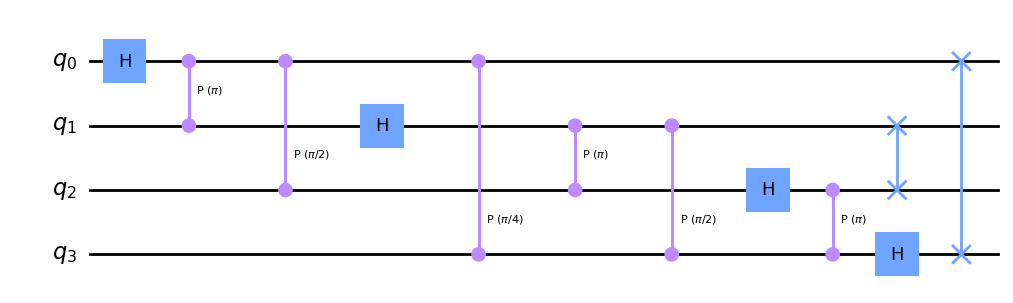

In [5]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np

# Function to create QFT circuit on quantum register
def qft_circuit(qc, n):
    # Apply Hadamard gates to each qubit
    for qubit in range(n):
        qc.h(qubit)
        for controlled_qubit in range(qubit + 1, n):
            angle = 2 * np.pi / (2 ** (controlled_qubit - qubit))
            qc.cp(angle, controlled_qubit, qubit)

    # Swap the qubits for proper ordering
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
from qiskit.circuit.library import QFT
# Create a quantum circuit
n = 4
qc = QuantumCircuit(n)
qft_circuit(qc, n)

# Visualize the circuit
qc.draw()


In this code cell, we define a function `modular_exponentiation()` that performs modular exponentiation on a quantum register. The function applies controlled gates and controlled-phase rotations to compute the modular exponentiation. We then create a quantum circuit with `n+1` qubits, representing the quantum register and an ancilla qubit, and apply the modular exponentiation using the specified exponent and base. Finally, we visualize the circuit using the `draw()` function.


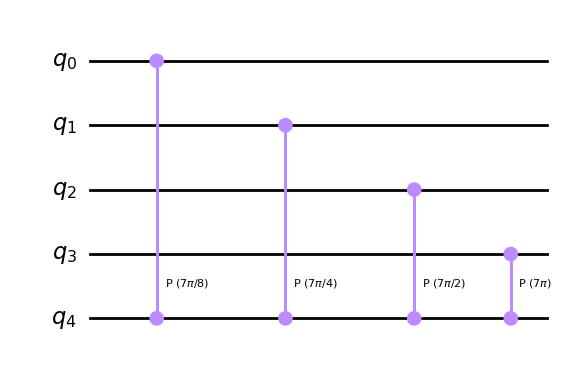

In [6]:
from qiskit import QuantumCircuit

# Function to apply modular exponentiation on quantum register
def modular_exponentiation(qc, n, exponent, base):
    for i in range(n):
        power = 2 ** i
        qc.cp((2 * np.pi * power * exponent) / (2 ** n), i, n)

# Create a quantum circuit
n = 4
qc = QuantumCircuit(n + 1)
exponent = 7
base = 3
modular_exponentiation(qc, n, exponent, base)

# Visualize the circuit
qc.draw()


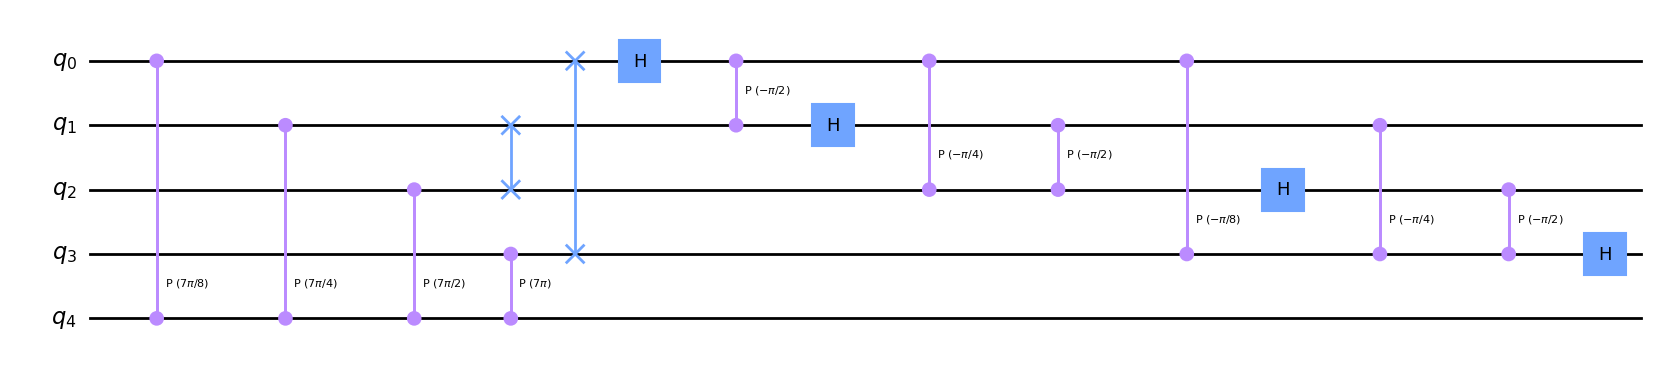

In [7]:
# Apply inverse Quantum Fourier Transform (QFT) to the quantum register
def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / float(2 ** (j - m)), m, j)
        qc.h(j)

# Apply inverse QFT to the quantum circuit
inverse_qft(qc, n)

# Visualize the circuit
qc.draw()


In this code cell, we add the measurement step to the quantum circuit. The `measure_all()` method is used to measure all the qubits in the quantum register and map them to classical bits.

After adding the measurement step, we visualize the circuit using the `draw()` method.

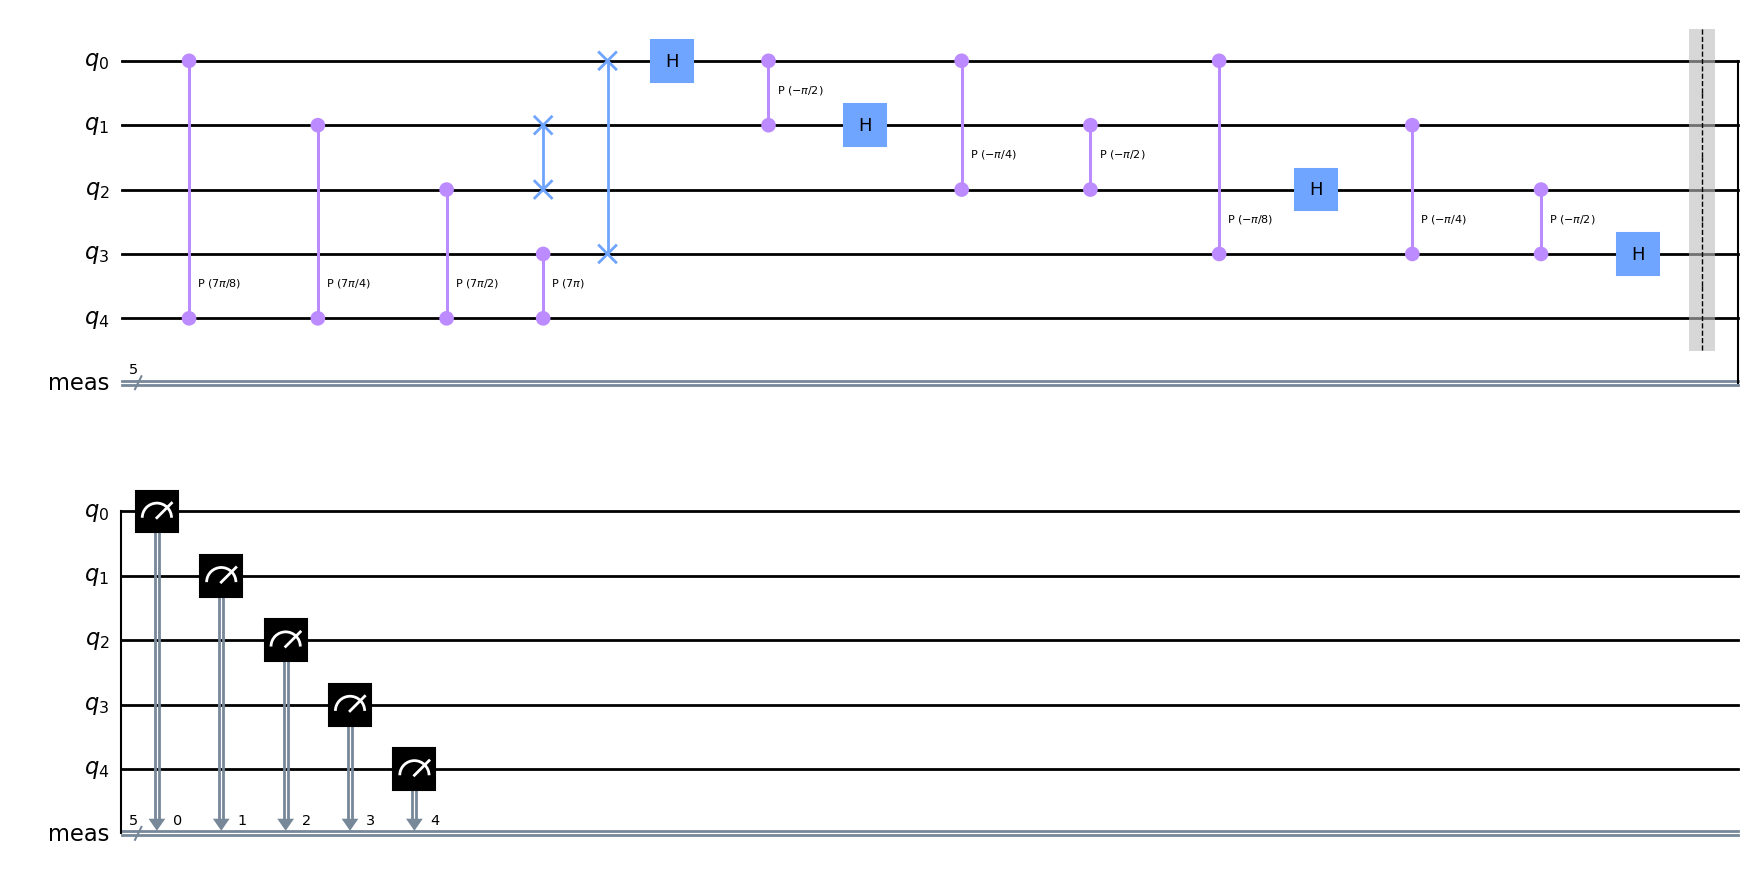

In [8]:
# Measure the quantum register
qc.measure_all()

# Visualize the circuit
qc.draw()


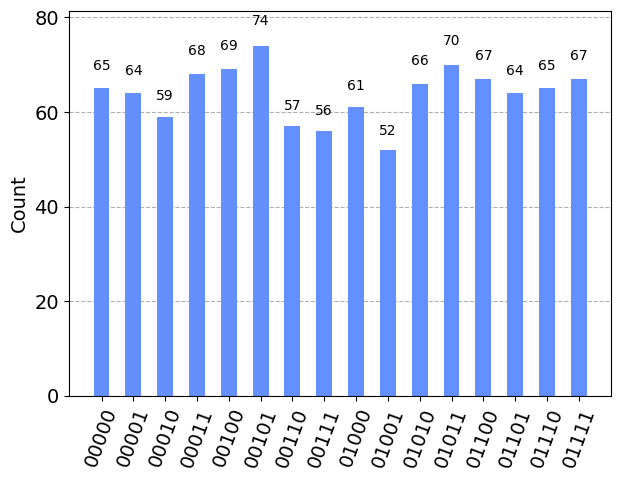

In [9]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the simulator
job = execute(qc, simulator, shots=1024)

# Get the result counts
result = job.result()
counts = result.get_counts()

# Visualize the result counts
plot_histogram(counts)


In [10]:
# Function to extract the measured value of the quantum register
def extract_integer(counts):
    for binary_string in counts:
        decimal_value = int(binary_string, 2)
        return decimal_value

# Extract the measured value
measured_value = extract_integer(counts)

# Print the measured value
print("Measured value:", measured_value)


Measured value: 2


In [11]:
code = 512
N = 15

In [12]:
def rsa(P, Q):
    N = P * Q # modulus <-- the hard number to crack!

    if N % 2 == 0:
        val = P if P % 2 == 0 else Q
        raise ValueError(f"{N} can not be divisible by 2.",
                         f"{P} and {Q} are incompatible with Shor's Algorithm.")

    L = (Q - 1) * (P - 1) # number of non-common factors (1, N)

    for E in range(2, L): # between [2, L)
        if gcd(L, E) * gcd(N, E) == 1: # coprime with both L and N
            break # E is public value

    D = 1
    while True:
        if D * E % L == 1 and D != E and D != N:
            break # D is private value
        D += 1

    return ((E, N), (D, N))

def dec(code, key):
    D, N = key
    return "".join([chr(((d**D) % N) + ord('A'))
                    for d in [int(d) for d in str(code)]])

In [13]:
from numpy.random import seed, randint
from numpy import gcd
seed(1)

a = randint(2, N) # 1 < a < N

if gcd(a, N) == 1: # a shares no factors
    print(f"{1} < {a} < {N}, {1 < a < N}")
else: # a shares a factor
    P = gcd(a, N)
    Q = N // gcd(a, N)
    print(f"P = {P}\nQ = {Q}\n\n",
          f"{P} x {Q} = {N}, {P * Q == N}\n")

1 < 7 < 15, True


In [14]:
def initialize_qubits(qc, n, m):
    qc.h(range(n)) # apply hadamard gates
    qc.x(n+m-1) # set qubit to 1

In [15]:
print(f"\tU(x) = a^x mod {N}")
def a_x_mod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U
def modular_exponentiation(qc, n, m, a):
    for x in range(n):
        exponent = 2**x
        qc.append(a_x_mod15(a, exponent), 
                     [x] + list(range(n, n+m)))

	U(x) = a^x mod 15


In [16]:
def apply_iqft(qc, measurement_qubits):
    qc.append(QFT(len(measurement_qubits),
                             do_swaps=False).inverse(),
                         measurement_qubits)

In [17]:
def measure(qc, n):
    qc.measure(n, n)

In [18]:
def period_finder(n, m, a):
    
    # set up quantum circuit
    qc = QuantumCircuit(n+m, n)
    
    # initialize the qubits
    initialize_qubits(qc, n, m)
    qc.barrier()

    # apply modular exponentiation
    modular_exponentiation(qc, n, m, a)
    qc.barrier()

    # apply inverse QFT
    apply_iqft(qc, range(n))
    qc.barrier()

    # measure the n measurement qubits
    measure(qc, range(n))
    
    return qc

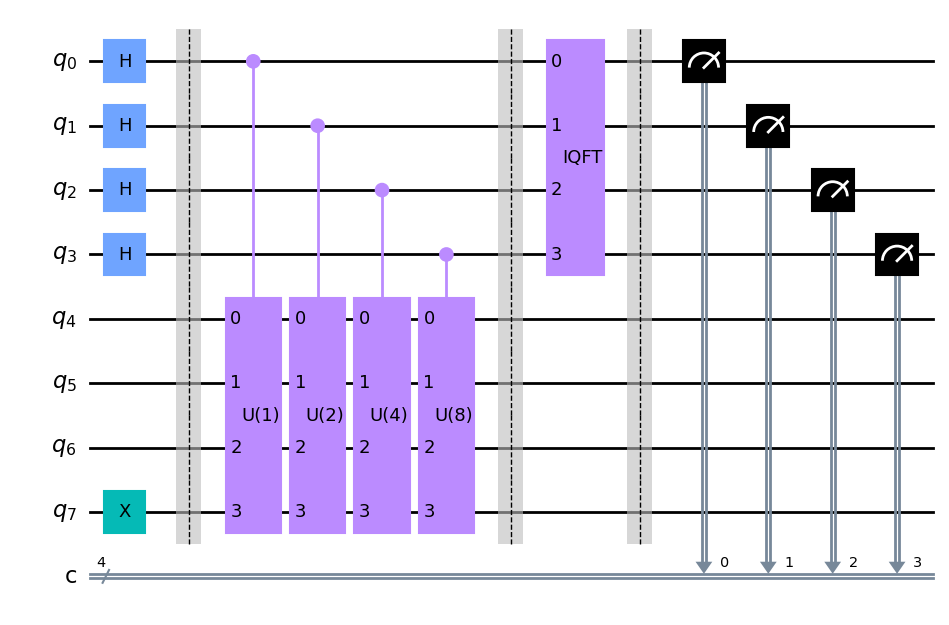

In [19]:
n = 4; m = 4

qc = period_finder(n, m, a)
qc.draw(output='mpl')

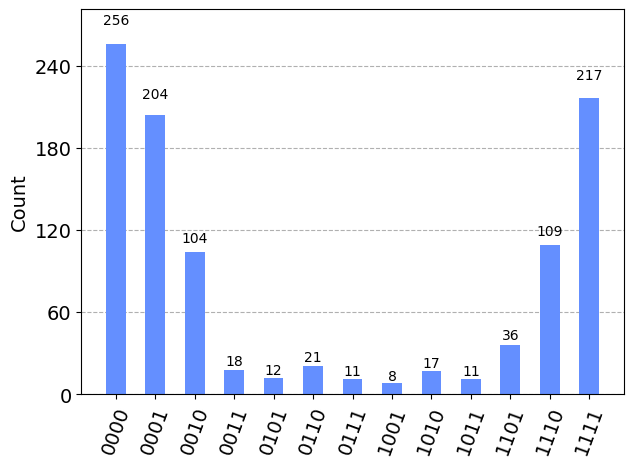

In [20]:

simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator).result().get_counts(qc)

plot_histogram(counts)

In [21]:
# convert and add binary periods to list
counts_dec = sorted([int(measured_value[::-1], 2)
                     for measured_value in counts])

print("Measured periods:", end='\t')
for measured_value in counts_dec:
    print(measured_value, end='\t')

Measured periods:	0	4	5	6	7	8	9	10	11	12	13	14	15	

In [22]:

# convert and add binary periods to list
counts_dec = sorted([int(measured_value[::-1], 2)
                     for measured_value in counts])

print("Measured periods:", end='\t')
periods=[]
for measured_value in counts_dec:
    print(measured_value, end='\t')
    periods.append(measured_value)
    

Measured periods:	0	4	5	6	7	8	9	10	11	12	13	14	15	

In [23]:
factors = set()

for x in periods:
    guesses = [gcd(int((a ** (measured_value/2))) + 1, N),
               gcd(int((a ** (measured_value/2))) - 1, N)]
    for guess in guesses:
        # ignore trivial factors
        if guess != 1 and guess != N and N % guess == 0:
            factors.add(guess)

if len(factors):
    P = factors.pop()
    Q = factors.pop() if len(factors) else N // P
    print(f"P = {P}\nQ = {Q}\n\n",
          f"{P} x {Q} = {N}, {P * Q == N}")
else:
    print("Shor's Algorithm Failed. Choose a different 'a'.")

P = 3
Q = 5

 3 x 5 = 15, True


In [24]:
_, priv_key = rsa(P, Q)
print("Using RSA and Shor's Algorithm,",
      f"you determine the private key to be:\n\t{priv_key}")

Using RSA and Shor's Algorithm, you determine the private key to be:
	(23, 15)


In [25]:
dec_str = dec(code, priv_key)
print(f"the decrypted string is {dec_str}!")

the decrypted string is FBI!
